In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

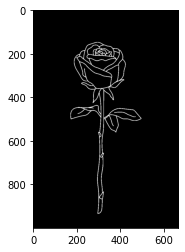

In [17]:
img = cv2.imread("flower.jpg")
_ , threshold_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_image, cmap='gray')
plt.show()

In [24]:
def findContours(img, mode='RETR_LIST'):

    _ , threshold_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    rows, cols = img.shape
    
    if mode=='RETR_LIST':
      
        h_landmarks = []
        for i in range(rows):
            object_in_row = False
            for j in range(cols):
                if threshold_img[i, j]==255 and object_in_row==False:
                    object_in_row = True
                    h_landmarks.append([i, j]) 
                elif threshold_img[i, j]==0 and object_in_row==True:
                    object_in_row = False
                    h_landmarks.append([i, j])
                    
       
        v_landmarks = []
        for i in range(cols):
            object_in_col = False
            for j in range(rows):
                if threshold_img[j, i]==255 and object_in_col==False:
                    object_in_col = True
                    v_landmarks.append([j, i])
                elif threshold_img[j, i]==0 and object_in_col==True:
                    object_in_col = False
                    v_landmarks.append([j, i])

    elif mode=='RETR_EXTERNAL':
   
        h_landmarks = []
        for i in range(rows):
            object_in_row = False
            exist = False
            tmp = []
            for j in range(cols):
                if threshold_img[i, j]==255 and object_in_row==False:
                    object_in_row = True
                    exist = True
                    tmp.append([i, j]) 
                elif threshold_img[i, j]==0 and object_in_row==True:
                    object_in_row = False
                    tmp.append([i, j])
            if exist:
                h_landmarks.extend([tmp[0], tmp[-1]])
       
        v_landmarks = []
        for i in range(cols):
            object_in_col = False
            exist = False
            tmp = []
            for j in range(rows):
                if threshold_img[j, i]==255 and object_in_col==False:
                    object_in_col = True
                    exist = True
                    tmp.append([j, i]) 
                elif threshold_img[j, i]==0 and object_in_col==True:
                    object_in_col = False
                    tmp.append([j, i])
            if exist:
                v_landmarks.extend([tmp[0], tmp[-1]])
            
    
    return h_landmarks, v_landmarks

In [26]:
h_lands, v_lands = findContours(img, 'RETR_EXTERNAL')

ValueError: too many values to unpack (expected 2)

In [27]:
bgr_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2BGR)
res_img = bgr_img.copy()

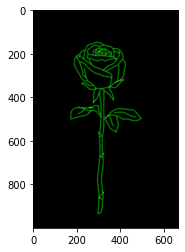

In [29]:

for vl in v_lands:
    cv2.circle(res_img, (vl[1], vl[0]), 1, (0,127,0), -1)
for hl in h_lands:
    cv2.circle(res_img, (hl[1], hl[0]), 1, (0,127,0), -1)
plt.imshow(res_img)
plt.show()

In [30]:

h_lands, v_lands = findContours(img, 'RETR_LIST')

bgr_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2BGR)
res_img = bgr_img.copy()

for vl in v_lands:
    cv2.circle(res_img, (vl[1], vl[0]), 1, (0,127,0), -1)
for hl in h_lands:
    cv2.circle(res_img, (hl[1], hl[0]), 1, (0,127,0), -1)

plt.imshow(res_img)
plt.show()

ValueError: too many values to unpack (expected 2)